# Visualize best model

## Overview

In this notebook, we select the best model from the ones built and trained with *build_model.ipynb*.
Then, we visualize and measure its performances. 

NB: I had troubles with loading the models. This notebook was not actually tested. 

## Requirements

In [1]:
!pip install scikit-plot

In [2]:
import pickle

from ModelSelector import ModelSelector
from ResultsVisualizer import ResultsVisualizer

## Get best model

In [3]:
model_selector = ModelSelector("models")
# model = model_selector.get_best_model()
# Because I had trouble with the pickle.load of the model, here I set a dummy model to run the code
!pip install git+https://github.com/apneal/classification_models.git@master
!pip install keras
import keras
from segmentation_models.models.unet_1d import Unet1D
model = Unet1D(backbone_name='resnet18_1d', input_shape = (None, 11))
model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=[
                    keras.metrics.BinaryAccuracy(),
                    keras.metrics.FalseNegatives()],
                )


dict_keys(['loss', 'binary_accuracy', 'false_negatives_8', 'val_loss', 'val_binary_accuracy', 'val_false_negatives_8'])
  Cloning https://github.com/apneal/classification_models.git (to revision master) to c:\users\camille\appdata\local\temp\pip-req-build-no15r_ix
  Resolved https://github.com/apneal/classification_models.git to commit e39838a94c8729d6d5d42027c07b7f0328b915b1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/apneal/classification_models.git 'C:\Users\Camille\AppData\Local\Temp\pip-req-build-no15r_ix'
  Running command git submodule update --init --recursive -q


Segmentation Models: using `tf.keras` framework.




## Visualize the model training

We can see that the training loss does not decrease at all. 
The model could have been too complex  for generalization. 
A first step in its simplification could have been to decrease the number of features of the input vector. 
For example, we can see that ribcage, abdos, BodyPos are very correlated, we could have selected only one of these features, 
or aggregated them. We could also have run a feature selector from sklearn to reduce the number of features. 
It is also possible that the loss function was not appropriate, or the data too imbalanced. Tuning some specific hyperparameters could have helped. 

Also, the validation set can be too small (one fifth of the training set) to be representative. 
Cross validation or data augmentation could have fixed this issue. 
NB: in this work, the validation set is a subset of the training set, some of its samples can come from recordings that
are also in the training set, explaining the high validation accuracy value. I should have created the validation set separately, with the DataLoader class, as done with the testing set. 

[0.15325696766376495, 0.11727811396121979, 0.10318215936422348, 0.09731508046388626, 0.09361107647418976, 0.09083443880081177, 0.09051848948001862, 0.0880952700972557, 0.0872107744216919, 0.08345113694667816, 0.08109718561172485, 0.0804920643568039, 0.07999226450920105, 0.07848154008388519, 0.07943100482225418]


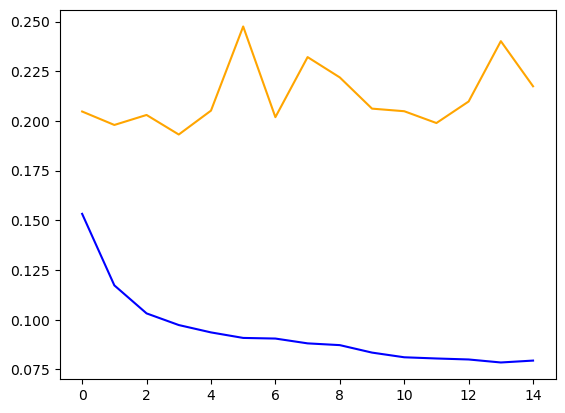

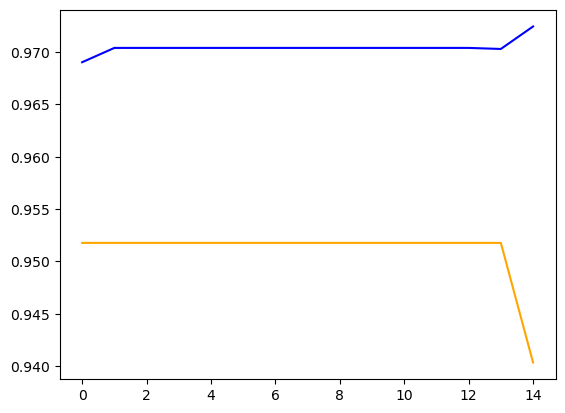

In [4]:
model_selector.plot_history(model_selector.get_best_model_index(), save_folder="results")

## Get model performance metrics 

### Load testing sets
So that we do not have to compute them all over again with DataLoader, 
we saved them in the *data* folder

In [5]:
with open("data/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
    
with open("data/y_test.pkl", "rb") as f:
    y_test = pickle.load(f) 

### Get metrics with testing set

Eventhough the predicted values are dummies, the confusion matrix enables to highlight the data imbalance. 
Data augmentation with a focus on the respiratory events could have helped, as well as a loss that focuses on
the wrongly predicted samples (e.g. BinaryFocalEntropy). 

150/150 [==============================] - 22s 130ms/step
F1 score 0.0
Accuracy score 0.8789517819706499


C:\Users\Camille\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision score 0.0
Recall score 0.0


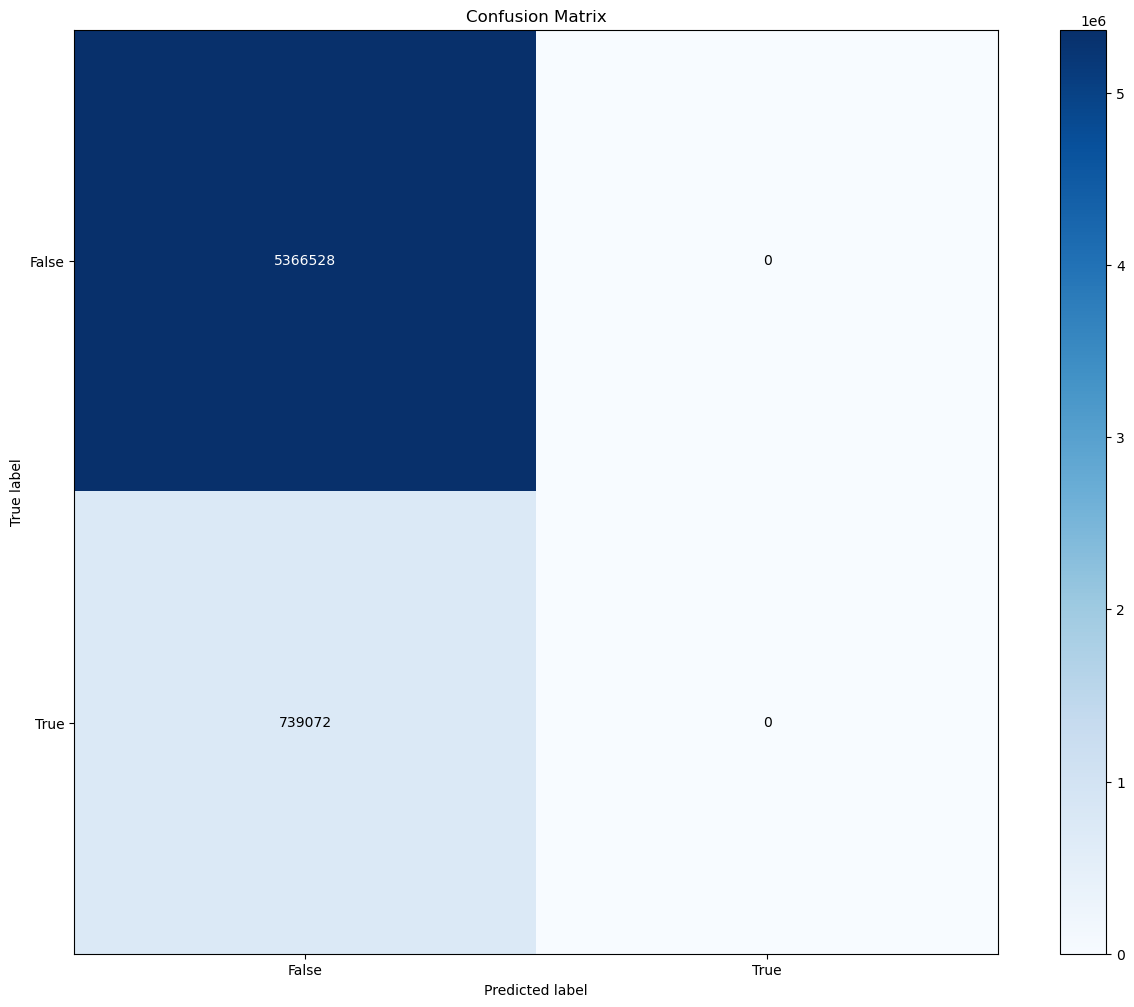

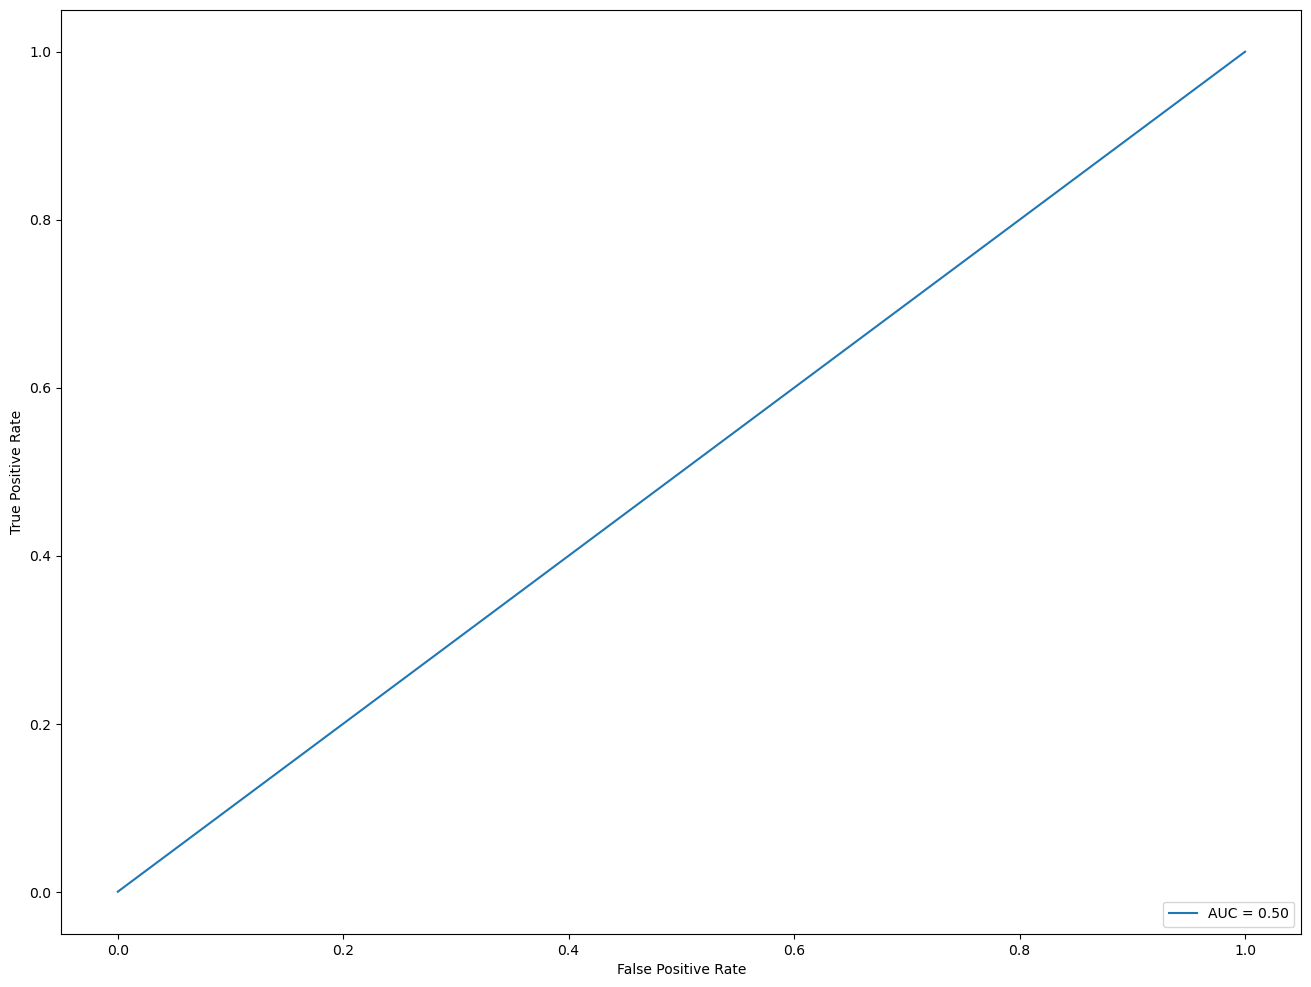

In [6]:
results_visualizer = ResultsVisualizer(model, X_test, y_test)

results_visualizer.compute_metrics()
results_visualizer.display_figures(save_folder = "results")

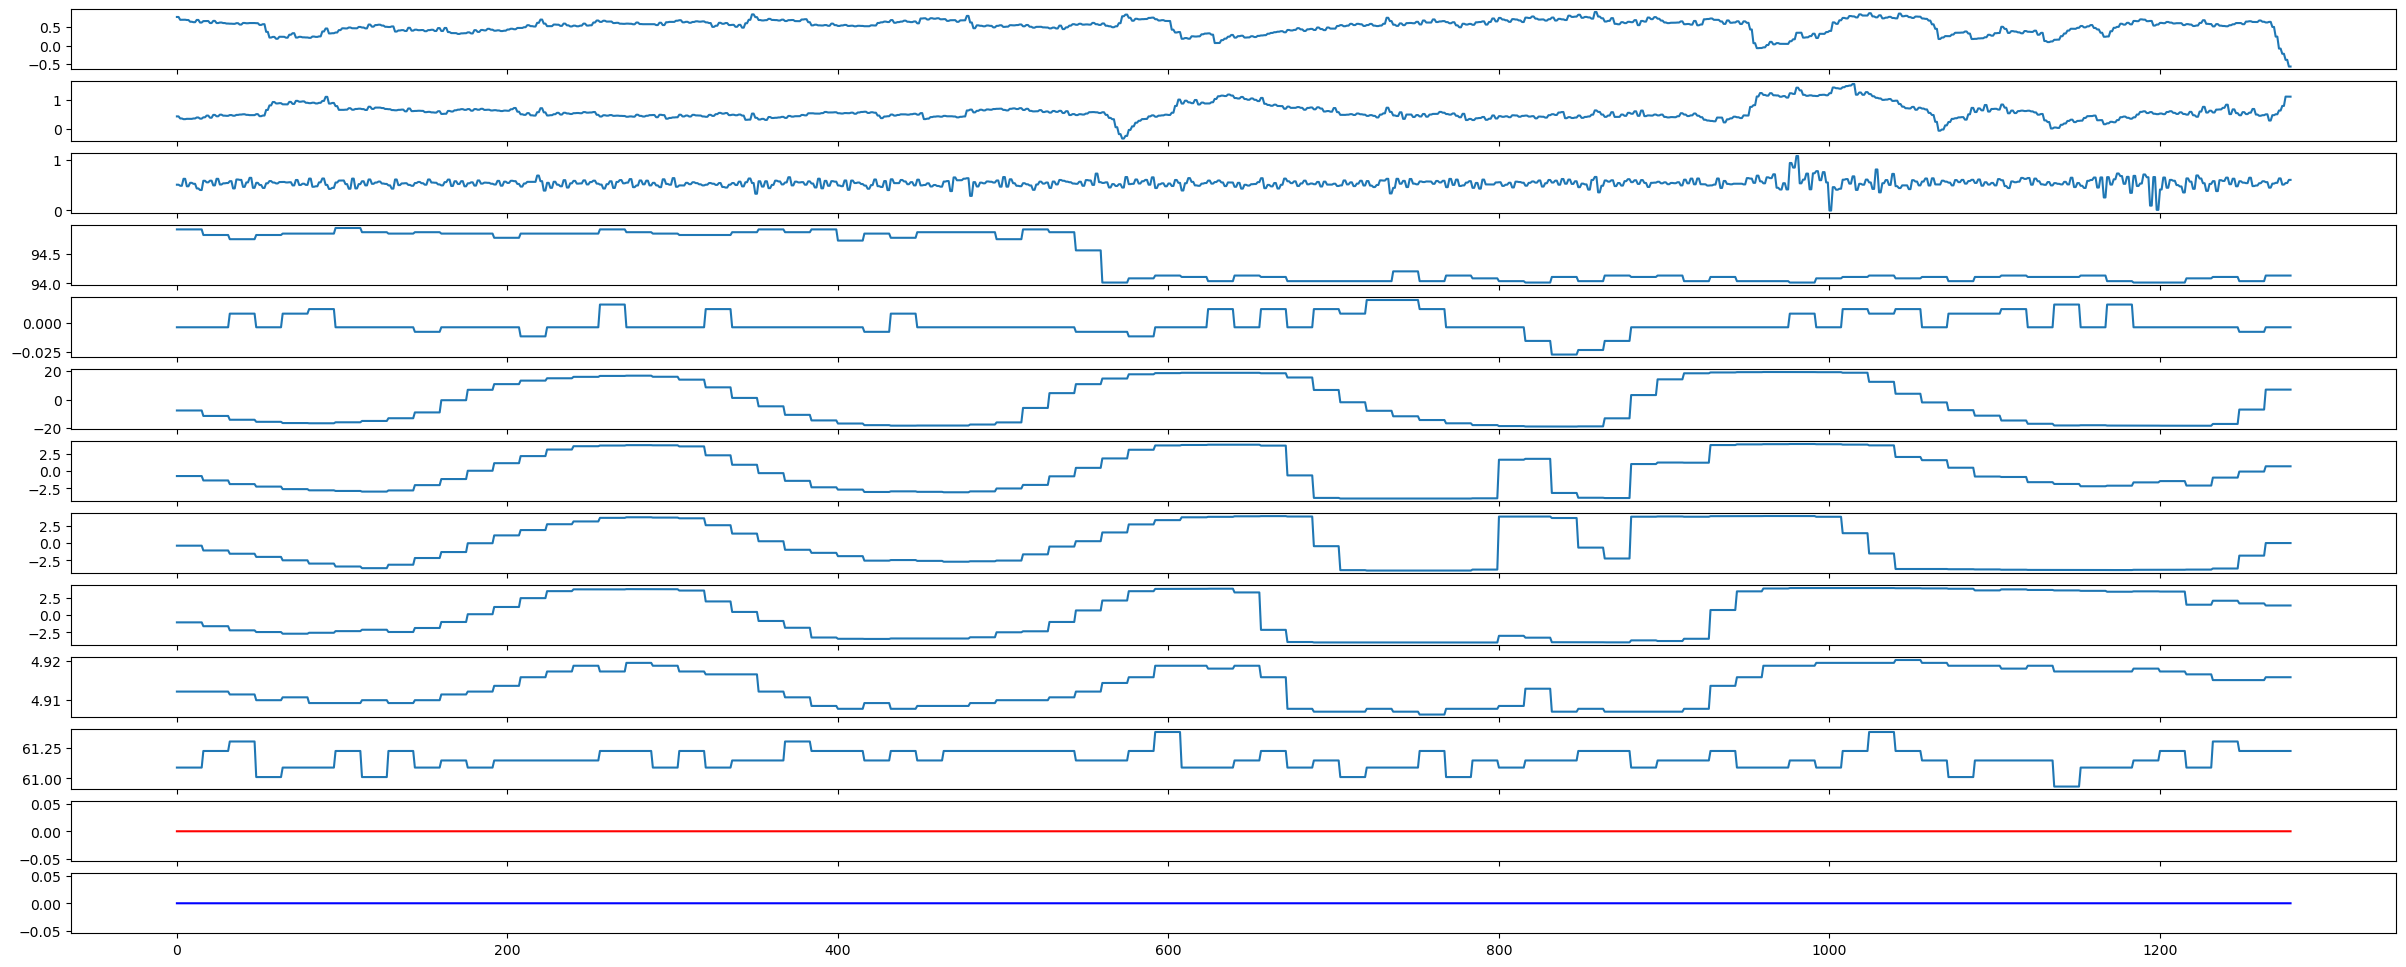

In [7]:
## Plot one row - indexed at 22, to better analyze what went wrong (or right) with the model. 
results_visualizer.plot_data(22, save_folder = "results")